This code is very usefull to plot the results from periodogram_bootstrap_multicore.py. 

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import os
import sys
from scipy.stats import norm
import matplotlib.mlab as mlab
%matplotlib notebook

In [2]:
def plot_per(freq,PLS,fla,min_per = 1,max_per = 10):
  fig, ax = plt.subplots()
  ax.plot(1. / freq, PLS,color='black')
  ax.axhline(fla, linestyle='dotted', color='black')
  ax.set(xlabel='period (days)',
          ylabel='Lomb-Scargle Power',
          xlim=(min_per, max_per),
          ylim=(0, 0.3));
  ax.grid(color='grey', linestyle='--', linewidth=0.5)
  ax.set_facecolor('xkcd:white')

In [3]:
def plot_hist(peaks):
    fig = plt.figure()
    plt.hist(peaks,bins = 10000)
    plt.yscale('log')

In [4]:
def peak_fit(peaks_fil,nbins):
    
    """
    This code fits a gaussian over a periodogram peak to determine it's mean value and standard deviation. 
    """
    
    (mu,sigma) = norm.fit(peaks_fil)
    fig = plt.figure()

    n, bins, patches = plt.hist(peaks_fil, nbins, normed=1, facecolor='green', alpha=0.75)
    plt.show()
    y = mlab.normpdf(bins, mu, sigma)
    l = plt.plot(bins, y, 'r--', linewidth=2)

    #plot
    plt.xlabel('Peak')
    plt.ylabel('Frequency')
    plt.title(r'$\mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
    plt.grid(True)

### Planet Name

In [1]:
DIR = #Directory to load the data
min_per = 1 #Minimum period
max_per = 10 #Maximum period 
pip = 'b'#pipeline used (Defines the season)
n_samples = 30000 #Number of samples taken
freq,per_sum,fla,peaks  = np.load(DIR+"bootstrap_"+str(min_per)+"_"+str(max_per)+"_"+str(pip)+"_samp_"+str(n_samples*3)+".npy")
peaks = 1/peaks

SyntaxError: invalid syntax (<ipython-input-1-9b775000ef9c>, line 1)

In [2]:
#Here we plot the average periodogram to observe the peaks
plot_per(freq,per_sum/(3*n_samples),fla,min_per,max_per)
print(1/freq)

NameError: name 'plot_per' is not defined

In [3]:
#Here we plot all the extracted peaks
plot_hist(peaks)

NameError: name 'plot_hist' is not defined

0.00731124040121
[ 1.18046059  1.18046059  1.18046059 ...,  1.22953167  1.22953167
  1.22953167]


<IPython.core.display.Javascript object>


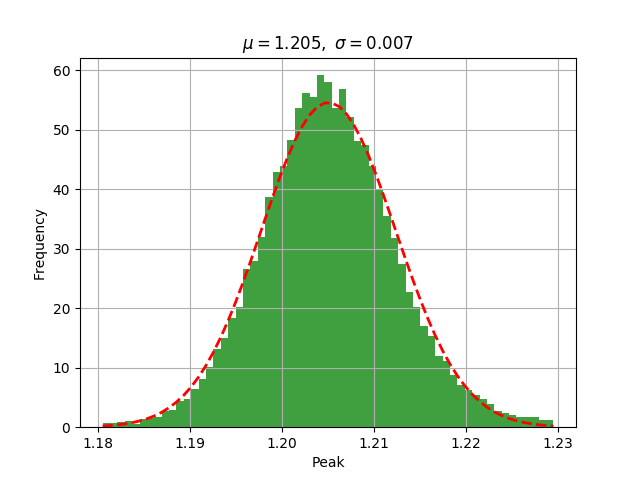

0.154566592758
[ 5.51041521  5.51041521  5.51041521 ...,  6.29919911  6.29919911
  6.29919911]


<IPython.core.display.Javascript object>


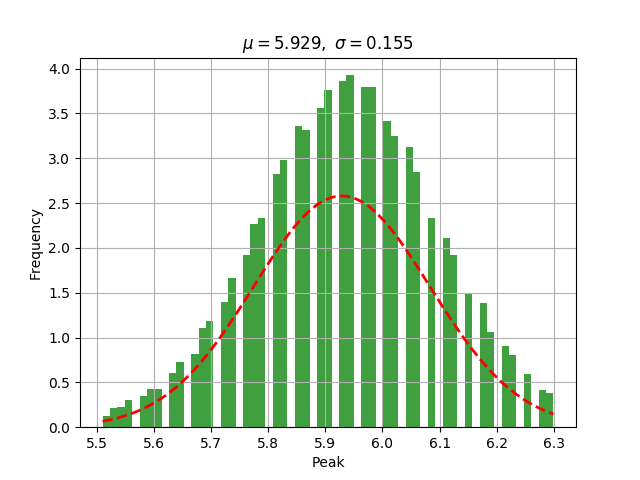

In [60]:
#Here we fit a single peak using a gaussian
peak_center = 1.2
peaks_fil = peaks[(peaks > (peak_center - 0.02)) & (peaks < (peak_center + 0.03))]
print(np.std(peaks_fil))
peak_fit(peaks_fil,61)